# Ungraded Lab: Automation & Reporting Lab

## Overview 
In this lab, you'll automate EngageMetrics' weekly employee performance reporting process. Building on your previous analysis, you'll create a Python-based system that transforms employee data into actionable insights for HR leaders. The automated report will track satisfaction trends across work modes (Remote, Hybrid, On-site), monitor department-level metrics, and identify areas for workplace improvement - all while reducing the time spent on manual report generation.

If you get stuck or need a refresher, refer back to the screencast where we demonstrated these concepts step-by-step. The video shows similar examples that can help guide you through this activity.

## Learning Outcomes 
By the end of this lab, you will be able to:
- Create automated data cleaning workflows using Python
- Generate professional visualizations with dynamic data updates
- Combine markdown and code cells for clear report documentation
- Build a reusable reporting template for weekly updates

## Dataset Information 
We'll work with the <b>employee_insights dataset,</b> containing employee performance metrics including:
- Employee demographics and work experience
- Performance scores and project completion rates
- Work modes (Remote, Hybrid, On-site) and satisfaction levels

## Activities

### Activity 1: Data Preparation and Cleaning
Let's start by creating a reusable data cleaning workflow.

<b>Step 1:</b> Import libraries and load data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display, Markdown

# Load the dataset
df = pd.read_csv("employee_insights.csv")

<b>Step 2:</b> Create a function that:
- Handles missing values
- Standardizes the work_mode and department categories
- Converts data types appropriately

In [2]:
# YOUR CODE HERE 

<b>Tip:</b> Document your cleaning steps with markdown comments for future reference.

### Activity 2: Visualization Functions

<b>Step 1:</b> Create a function that generates:
- A bar plot of average satisfaction by department
- Include error bars for standard deviation

In [3]:
# YOUR CODE HERE 

<b>Step 2:</b> Build work mode analysis by creating a function that shows:
- Distribution of satisfaction scores by work_mode
- Use appropriate color schemes and labels

In [4]:
# YOUR CODE HERE

<b>Tip:</b> Use plt.style to maintain consistent visualization styling.

### Activity 3: Automated Report Generation

<b>Step 1:</b> Write a function that generates a markdown cell with:
- Dynamic date stamps: uses datetime.now() to insert the current date at the time the function is called
- Key metrics summary
- Section headers for visualizations

In [5]:
# YOUR CODE HERE 

<b>Step 2:</b> Combine all components by creating a main function that:
- Runs the cleaning process
- Generates all visualizations
- Produces the final report:

In [6]:
# YOUR CODE HERE

<b>Test Your Work:</b>
1. Run your automation script


2. Verify the report includes:
    - Current date
    - Clean data summary
    - All visualizations
    - Proper formatting

## Success Checklist
- Data cleaning function works automatically
- Visualizations generate without errors
- Markdown report is properly formatted
- All components update with new data
- Code is well-documented

## Common Issues & Solutions 
- Problem: Visualizations don't update 
    - Solution: Ensure plt.clf() is called between plots, and that plt.show() is used to display updates 
- Problem: Markdown formatting breaks 
    - Solution: Check for proper cell type assignment

## Summary 
Nice work! You've built an automated reporting system that transforms raw employee data into professional, data-driven insights - a crucial skill for streamlining business workflows.

### Key Points
- Automation reduces regular reporting time
- Consistent formatting improves readability
- Documentation ensures maintainability

## Solution Code
Stuck on your code or want to check your solution? Here's a complete reference implementation to guide you. This represents just one effective approach—try solving independently first, then use this to overcome obstacles or compare techniques. The solution is provided to help you move forward and explore alternative approaches to achieve the same results. Happy coding!

### Activity 1: Data Preparation and Cleaning - Solution Code

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display, Markdown

# Load the dataset
df = pd.read_csv("employee_insights.csv")

def clean_data(df):
    """Clean and prepare the employee data."""
    
    # Create a copy to avoid modifying original
    df_clean = df.copy()
    
    # Standardize work_mode categories
    df_clean['work_mode'] = df_clean['work_mode'].str.strip().str.lower().str.split().str[0]


    # Standardize department values df_clean['department'] =     
    df_clean['department'] = df_clean['department'].str.capitalize()

    # Transform and convert work_experience data type
    df_clean['work_experience'] = df_clean['work_experience'].str.extract(r'(\d+)').astype(float)

    # Handles missing values
    numeric_cols = ['satisfaction_score', 'projects_completed', 'work_experience']
    df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())
    return df_clean

### Activity 2: Visualization Functions - Solution Code

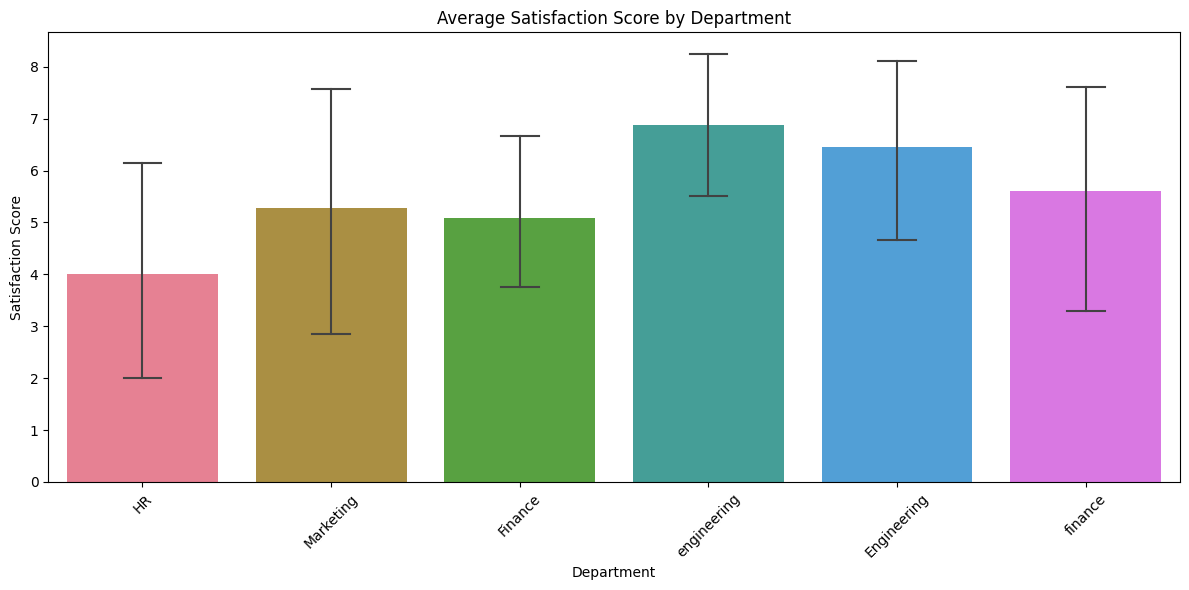

In [8]:
def create_performance_plot(df):
    """Generate performance visualization."""
    
    plt.figure(figsize=(12, 6))
    
    sns.barplot(
        data=df,
        x='department',
        y='satisfaction_score',
        hue='department',  # Required when using `palette`
        legend=False,
        capsize=0.2,
        palette='husl',
        err_kws={'linewidth': 1.5}
    )
    
    plt.title('Average Satisfaction Score by Department')
    plt.xlabel('Department')
    plt.ylabel('Satisfaction Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
    return None
create_performance_plot(df)

def create_workmode_analysis(df):
    """Generate work mode analysis visualization."""
    
    plt.figure(figsize=(10, 6))
    
    # Create violin plot
    sns.violinplot(x='work_mode', y='satisfaction_score', data=df, hue='work_mode', palette='husl')
    
    plt.title('Satisfaction Score Distribution by Work Mode')
    plt.xlabel('Work Mode')
    plt.ylabel('Satisfaction Score')
    plt.tight_layout()
    plt.show()
    
    return None

### Activity 3: Automated Report Generation - Solution Code


# Employee Performance Report

**Generated on:** 2025-07-21

## Key Metrics
- Total Employees: 100
- Average Satisfaction Score: 5.57

## Summary
- Department with highest satisfaction: Engineering
- Most common work mode: remote


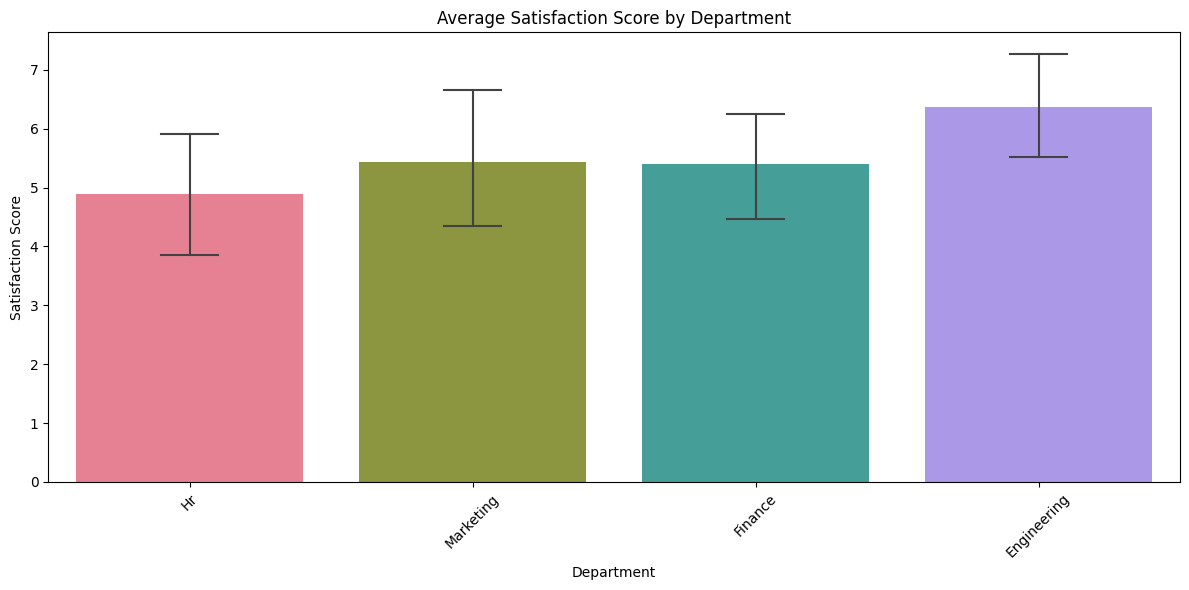

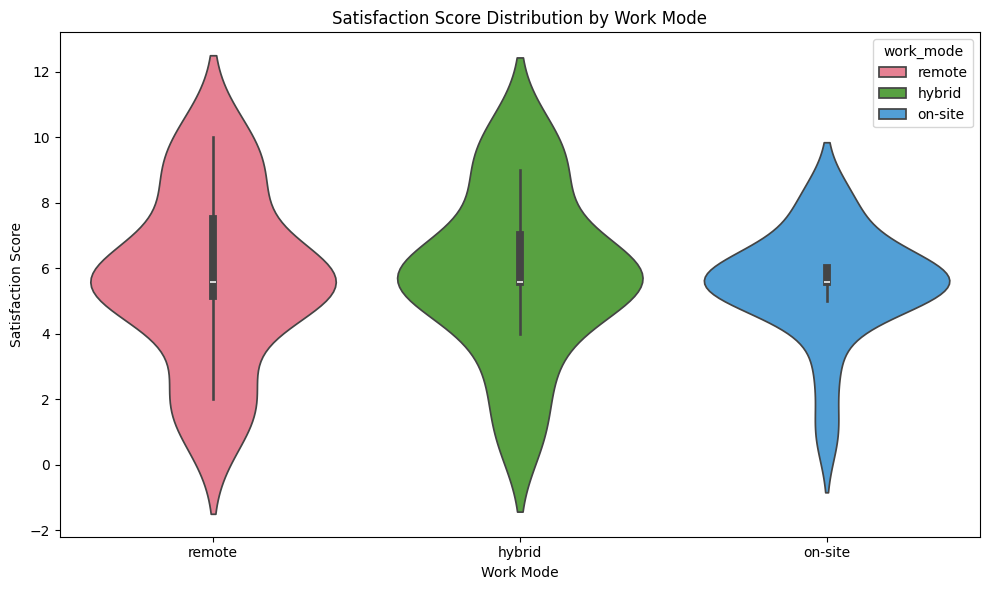

In [9]:
def generate_report_markdown(df):
    current_date = datetime.now().strftime('%Y-%m-%d')
    avg_satisfaction = df['satisfaction_score'].mean()
    total_employees = len(df)
    top_department = df.groupby('department')['satisfaction_score'].mean().idxmax()
    common_work_mode = df['work_mode'].mode()[0]
    
    markdown_template = f"""
# Employee Performance Report

**Generated on:** {current_date}

## Key Metrics
- Total Employees: {total_employees}
- Average Satisfaction Score: {avg_satisfaction:.2f}

## Summary
- Department with highest satisfaction: {top_department}
- Most common work mode: {common_work_mode}
"""
    return markdown_template

def display_full_report(df):
    # Show report text
    display(Markdown(generate_report_markdown(clean_data(df))))
    
    # Show plots inline
    create_performance_plot(clean_data(df))
    create_workmode_analysis(clean_data(df))

display_full_report(df)